In [1]:
using Plots, ParameterizedFunctions, DifferentialEquations

In [2]:
g = @ode_def begin
  dx = σ*(y-x)
  dy = x*(ρ-z) - y
  dz = x*y - β*z
end σ ρ β

#361 (generic function with 2 methods)

In [3]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,80.0)
p = [10.0,28.0,8/3]
prob = ODEProblem(g,u0,tspan,p)
sol = solve(prob, Tsit5(), saveat=0.01);
xm, xM = extrema(sol[1,:])
ym, yM = extrema(sol[2,:])
zm, zM = extrema(sol[3,:]);

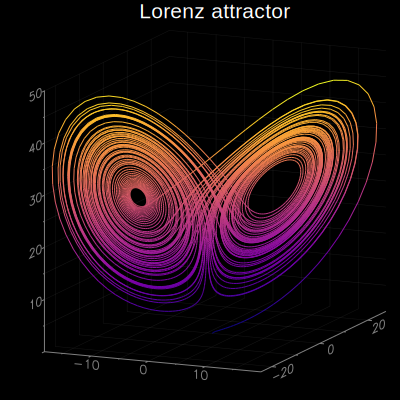

In [4]:
plot(sol[1,:],sol[2,:],sol[3,:], xlim = (xm, xM), ylim = (ym, yM),
 zlim = (zm, zM), fgcolor_axis= :grey, tickfontcolor = :grey,
    title = "Lorenz attractor", size = (400,400),
    legend = false, bg = :black, c = :plasma, linez = sol[3,:])
#savefig("lorenz.png")

In [5]:
animL = @animate for i=1:8000
    k = i > 60 ? i - 55 : 1
    plot(sol[1,k:i], sol[2,k:i], sol[3,k:i],xlim = (xm, xM), 
        ylim = (ym, yM), zlim = (zm, zM), fgcolor_axis= :grey, tickfontcolor = :grey,
        c = :plasma, bg = :black, leg = false,  size = (400,400),
        title = "Lorenz attractor", linez = sol[3,k:i], colorbar = false ) # camera = (i*0.01, 45))
    plot!([sol[1,i]], [sol[2,i]], [sol[3,i]],  marker = (3, :white, stroke(0)))
    end every 5

Animation("/var/folders/jr/9ds1d57s08j2dhr6rf6gf4q80000gp/T/tmpbYggLh", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "001591.png", "001592.png", "001593.png", "001594.png", "001595.png", "001596.png", "001597.png", "001598.png", "001599.png", "001600.png"])

In [7]:
#gif(animL, "lorenzSingle.gif")
#gif(animL, "lorenzSingle.mp4")

In [27]:
animLc = @animate for i=1:8000
    k = 1
    plot(sol[1,k:i], sol[2,k:i], sol[3,k:i],xlim = (xm, xM), 
        ylim = (ym, yM), zlim = (zm, zM), fgcolor_axis= :grey, tickfontcolor = :grey,
        c = :plasma, bg = :black, leg = false, size = (400,400),
        title = "Lorenz attractor", linez = sol[3,k:i], colorbar = false ) # camera = (i*0.01, 45))
    plot!([sol[1,i]], [sol[2,i]], [sol[3,i]],  marker = (3, :white, stroke(0)))
    end every 5

Animation("/var/folders/jr/9ds1d57s08j2dhr6rf6gf4q80000gp/T/tmps3656V", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "001591.png", "001592.png", "001593.png", "001594.png", "001595.png", "001596.png", "001597.png", "001598.png", "001599.png", "001600.png"])

In [28]:
gif(animLc, "lorenzSinglec.gif")
gif(animLc, "lorenzSinglec.mp4")

┌ Info: Saved animation to 
│   fn = /Users/lalonso/Documents/CodeSnippets/CodeSnippetsJulia/recipesPlots/lorenzSinglec.gif
└ @ Plots /Users/lalonso/.julia/packages/Plots/Iuc9S/src/animation.jl:95
┌ Info: Saved animation to 
│   fn = /Users/lalonso/Documents/CodeSnippets/CodeSnippetsJulia/recipesPlots/lorenzSinglec.mp4
└ @ Plots /Users/lalonso/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/lalonso/Documents/CodeSnippets/CodeSnippetsJulia/recipesPlots/lorenzSinglec.mp4")

In [8]:
# Choose random starting points, uniformly distributed from -15 to 15
using Random 
Random.seed!(1);

In [9]:
tronLegacy = ["#FF410DFF", "#6EE2FFFF", "#F7C530FF", "#95CC5EFF", "#D0DFE6FF", 
    "#F79D1EFF", "#748AA6FF"];

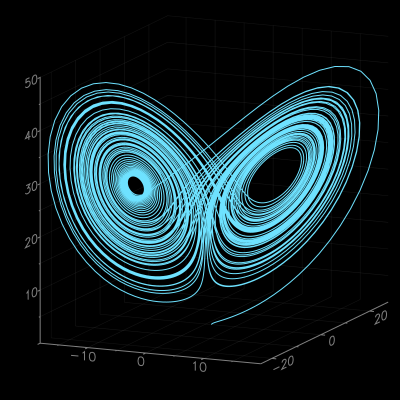

In [10]:
plot(sol[1,:], sol[2,:],sol[3,:], xlim = (xm, xM), ylim = (ym, yM),
 zlim = (zm, zM), fgcolor_axis= :grey, tickfontcolor = :grey, size = (400,400),
    legend = false, bg = :black, c = tronLegacy[2])

In [11]:
using Random 
Random.seed!(123)
Ntraj = 7
x0 = -15 .+ 30 * rand(Ntraj, 3)
soluciones = []
for i in 1:7
    u = x0[i,:]
    prob = ODEProblem(g, u, tspan, p)
    sol = solve(prob, Tsit5(), saveat=0.01)
    push!(soluciones, sol)
end

In [12]:
animLensem = @animate for i=1:8000
    k = i > 60 ? i - 55 : 1
    sol = soluciones[1]
    plot(sol[1,k:i], sol[2,k:i], sol[3,k:i],xlim = (-35, 35), 
        ylim = (-35, 35), zlim = (-17, 60), fgcolor_axis= :grey, 
        tickfontcolor = :grey, title = "Lorenz attractor", size = (400,400),
        c = tronLegacy[1], bg = :black, leg = false,
        colorbar = false)#, camera = (i*0.1, 45))
    
    plot!([sol[1,i]], [sol[2,i]], [sol[3,i]],  
        marker = (3, tronLegacy[1], stroke(0)))
    
    for jj in 2:7
        sol = soluciones[jj]
        plot!(sol[1,k:i], sol[2,k:i], sol[3,k:i], c = tronLegacy[jj])
        plot!([sol[1,i]], [sol[2,i]], [sol[3,i]], 
            marker = (3, tronLegacy[jj], stroke(0)))
    end
        
    end every 10

Animation("/var/folders/jr/9ds1d57s08j2dhr6rf6gf4q80000gp/T/tmpoDa95q", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000791.png", "000792.png", "000793.png", "000794.png", "000795.png", "000796.png", "000797.png", "000798.png", "000799.png", "000800.png"])

In [13]:
#gif(animLensem, "lorenztj.mp4")
gif(animLensem, "lorenztj.gif")

┌ Info: Saved animation to 
│   fn = /Users/lalonso/Documents/CodeSnippets/CodeSnippetsJulia/recipesPlots/lorenztj.gif
└ @ Plots /Users/lalonso/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/lalonso/Documents/CodeSnippets/CodeSnippetsJulia/recipesPlots/lorenztj.gif")

In [19]:
animLensem2 = @animate for i=1:8000
    k = 1 #i > 60 ? i - 55 : 1
    sol = soluciones[1]
    plot(sol[1,k:i], sol[2,k:i], sol[3,k:i],xlim = (-35, 35), 
        ylim = (-35, 35), zlim = (-17, 60), fgcolor_axis= :grey, 
        tickfontcolor = :grey, size = (400,400),
        c = tronLegacy[1], bg = :black, leg = false,
        colorbar = false)#, camera = (i*0.1, 45))
    
    plot!([sol[1,i]], [sol[2,i]], [sol[3,i]],  
        marker = (3, tronLegacy[1], stroke(0)))
    
    for jj in 2:7
        sol = soluciones[jj]
        plot!(sol[1,k:i], sol[2,k:i], sol[3,k:i], c = tronLegacy[jj])
        plot!([sol[1,i]], [sol[2,i]], [sol[3,i]], 
            marker = (3, tronLegacy[jj], stroke(0)))
    end
        
    end every 10

Animation("/var/folders/jr/9ds1d57s08j2dhr6rf6gf4q80000gp/T/tmphU4qDT", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000791.png", "000792.png", "000793.png", "000794.png", "000795.png", "000796.png", "000797.png", "000798.png", "000799.png", "000800.png"])

In [14]:
#gif(animLensem2, "lorenztj2.mp4")
#gif(animLensem2, "lorenztj2.gif")

In [ ]:
tubew = 0.05 .- 0.01t
x = (1 .- t) .* cos.(t)
y = 6t
z = (1 .- t) .* sin.(t)
# Plot the points
plot(x, y, z, lw = 0.3t, c = :viridis, linez = t, colorbar = false, camera = (3,80),
    aspect_ratio =1,
    size = (500,600), legend = false
)